In [1]:
import networkx as nx
from diffusion_models import Weighted_Cascade, Trivalency_Model, Independent_Cascade, Decreasing_Cascade, linear_threshold, general_threshold
from influence_max_algorithms import MIA
import matplotlib.pyplot as plt
import numpy as np
import tqdm as tqdm
import time as time

import pickle


In [2]:
pb2020 = nx.read_gml('/Users/davidguzman/Documents/GitHub/Network-Science-final-Maximization-/Proud_Boys_Datsets/PB2020.gml')

In [3]:
#invert edge direction for PB2020
pb2020 = pb2020.reverse()

In [4]:
#print number of nodes and edges
print('Number of nodes: ', pb2020.number_of_nodes())
print('Number of edges: ', pb2020.number_of_edges())


Number of nodes:  13217
Number of edges:  14477


In [5]:
seed_size = 30

In [6]:
ICM_model_2020 = Independent_Cascade()
ICM_model_2020.fit(pb2020)
decreasing_cascade_model_2020 = Decreasing_Cascade()
decreasing_cascade_model_2020.fit(pb2020)
weighted_cascade_model_2020 = Weighted_Cascade()
weighted_cascade_model_2020.fit(pb2020)
trivalency_model_2020 = Trivalency_Model()
trivalency_model_2020.fit(pb2020)
linear_threshold_model_2020 = linear_threshold()
linear_threshold_model_2020.fit(pb2020)
general_threshold_model_2020 = general_threshold()
general_threshold_model_2020.fit(pb2020)

In [7]:
def assing_model_probs_to_weights(model):
    pb2020_model = pb2020.copy()
    for edge in pb2020_model.edges():
        prob = model.probability[model.label2id[edge[0]], model.label2id[edge[1]]]

        if pb2020_model.in_degree(edge[0]) == 0: # to avoid division by 0

            pb2020_model[edge[0]][edge[1]]['weight'] = prob
            pb2020_model[edge[0]][edge[1]]['weight_negative_log'] = np.abs(np.log(prob + 0.00000001)) # to avoid diverging to - infinity
        else:

            pb2020_model[edge[0]][edge[1]]['weight'] = prob
            pb2020_model[edge[0]][edge[1]]['weight_negative_log'] = np.abs(np.log(prob))
    return pb2020_model

In [8]:
def assing_model_probs_to_weights_threshold(model):
    pb2020_model = pb2020.copy()
    for edge in pb2020_model.edges():
        prob = model.influence[model.label2id[edge[0]], model.label2id[edge[1]]]

        if pb2020_model.in_degree(edge[0]) == 0: # to avoid division by 0

            pb2020_model[edge[0]][edge[1]]['weight'] = prob
            pb2020_model[edge[0]][edge[1]]['weight_negative_log'] = np.abs(np.log(prob + 0.00000001)) # to avoid diverging to - infinity
        else:

            pb2020_model[edge[0]][edge[1]]['weight'] = prob
            pb2020_model[edge[0]][edge[1]]['weight_negative_log'] = np.abs(np.log(prob))
    return pb2020_model

# Weighted Cascade probabilities + MIA

In [9]:
pb2020_independent_cascade = assing_model_probs_to_weights(ICM_model_2020)
pb2020_weighted_cascade = assing_model_probs_to_weights(weighted_cascade_model_2020)
pb2020_decreasing_cascade = assing_model_probs_to_weights(decreasing_cascade_model_2020)
pb2020_trivalency = assing_model_probs_to_weights(trivalency_model_2020)

In [10]:
pb2020_linear_threshold = assing_model_probs_to_weights_threshold(linear_threshold_model_2020)
pb2020_general_threshold = assing_model_probs_to_weights_threshold(general_threshold_model_2020)

In [11]:
mia = MIA(pb2020_weighted_cascade)
mia_icm = MIA(pb2020_independent_cascade)
mia_decreasing = MIA(pb2020_decreasing_cascade)
mia_trivalency = MIA(pb2020_trivalency)
mia_linear_threshold = MIA(pb2020_linear_threshold)
mia_general_threshold = MIA(pb2020_general_threshold)

In [ ]:
seed_wcm = mia.MIA_fast(pb2020_weighted_cascade, 100, 0.5)

#remove duplicates
seed_wcm = list(dict.fromkeys(seed_wcm))

with open('seed_wcm.pickle', 'wb') as handle:
    pickle.dump(seed_wcm, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [12]:
seed_icm = mia_icm.MIA_fast(pb2020_independent_cascade, 100, 0.5)
#remove duplicates
seed_icm = list(dict.fromkeys(seed_icm))
#pickle it
with open('seed_icm.pickle', 'wb') as handle:
    pickle.dump(seed_icm, handle, protocol=pickle.HIGHEST_PROTOCOL)


Starting MIA intialization


100%|██████████| 13217/13217 [00:46<00:00, 282.38it/s]


Initialization Completed


100%|██████████| 100/100 [20:41<00:00, 12.41s/it]


In [13]:
seed_dc = mia_decreasing.MIA_fast(pb2020_decreasing_cascade, 100, 0.5)
#remove duplicates
seed_dc = list(dict.fromkeys(seed_dc))
#pickle it
with open('seed_dc.pickle', 'wb') as handle:
    pickle.dump(seed_dc, handle, protocol=pickle.HIGHEST_PROTOCOL)

Starting MIA intialization


100%|██████████| 13217/13217 [00:45<00:00, 292.91it/s]


Initialization Completed


100%|██████████| 100/100 [19:18<00:00, 11.58s/it]


In [14]:
seed_trivalency = mia_trivalency.MIA_fast(pb2020_trivalency, 100, 0.5)
#remove duplicates
seed_trivalency = list(dict.fromkeys(seed_trivalency))
#pickle it
with open('seed_trivalency.pickle', 'wb') as handle:
    pickle.dump(seed_trivalency, handle, protocol=pickle.HIGHEST_PROTOCOL)

Starting MIA intialization


100%|██████████| 13217/13217 [00:44<00:00, 295.98it/s]


Initialization Completed


100%|██████████| 100/100 [18:20<00:00, 11.00s/it]


In [15]:
seed_lt = mia_linear_threshold.MIA_fast(pb2020_linear_threshold, 100, 0.5)
#remove duplicates
seed_lt = list(dict.fromkeys(seed_lt))
#pickle it
with open('seed_lt.pickle', 'wb') as handle:
    pickle.dump(seed_lt, handle, protocol=pickle.HIGHEST_PROTOCOL)

Starting MIA intialization


100%|██████████| 13217/13217 [00:42<00:00, 312.00it/s]


Initialization Completed


100%|██████████| 100/100 [18:21<00:00, 11.02s/it]


In [16]:
seed_gt = mia_general_threshold.MIA_fast(pb2020_general_threshold, 100, 0.5)
#remove duplicates
seed_gt = list(dict.fromkeys(seed_gt))
#pickle it
with open('seed_gt.pickle', 'wb') as handle:
    pickle.dump(seed_gt, handle, protocol=pickle.HIGHEST_PROTOCOL)

Starting MIA intialization


100%|██████████| 13217/13217 [00:44<00:00, 294.25it/s]


Initialization Completed


100%|██████████| 100/100 [19:11<00:00, 11.51s/it]


In [ ]:
#load the seeds
with open('seed_wcm.pickle', 'rb') as handle:
    seed_wcm = pickle.load(handle)
    
with open('seed_icm.pickle', 'rb') as handle:
    seed_icm = pickle.load(handle)

with open('seed_dc.pickle', 'rb') as handle:
    seed_dc = pickle.load(handle)

with open('seed_trivalency.pickle', 'rb') as handle:
    seed_trivalency = pickle.load(handle)

with open('seed_lt.pickle', 'rb') as handle:
    seed_lt = pickle.load(handle)

with open('seed_gt.pickle', 'rb') as handle:
    seed_gt = pickle.load(handle)

In [32]:
"""activate_nums = weighted_cascade_model_2020.monte_carlo_diffusion_all(seed_wcm[:seed_size], num_simulations=10)
print(activate_nums)
print('total nodes reached: ' + str(sum(activate_nums)))"""

[  30.  1679.1]
total nodes reached: 1709.1


In [ ]:
#calcualate the number of nodes reached by the seed sets generated by MIA using seed sets of size 5, 10, 20
activate_nums_dict_wcm = {}
for i in range(1, 100, 5):
    seed_wcm_temp = seed_wcm[:i]
    activate_nums = weighted_cascade_model_2020.monte_carlo_diffusion_all(seed_wcm[:i], num_simulations=10)
    activate_nums_dict_wcm[i] = sum(activate_nums)
    #print('total nodes reached with seed set of size ' + str(i) + ': ' + str(sum(activate_nums)))

#do the same for the other models
activate_nums_dict_icm = {}
for i in range(1, 100, 5):
    seed_icm_temp = seed_icm[:i]
    activate_nums = ICM_model_2020.monte_carlo_diffusion_all(seed_icm[:i], num_simulations=10)
    activate_nums_dict_icm[i] = sum(activate_nums)
    #print('total nodes reached with seed set of size ' + str(i) + ': ' + str(sum(activate_nums)))

activate_nums_dict_dc = {}
for i in range(1, 100, 5):
    seed_dc_temp = seed_dc[:i]
    activate_nums = decreasing_cascade_model_2020.monte_carlo_diffusion_all(seed_dc[:i], num_simulations=10)
    activate_nums_dict_dc[i] = sum(activate_nums)
    #print('total nodes reached with seed set of size ' + str(i) + ': ' + str(sum(activate_nums)))

activate_nums_dict_tr = {}
for i in range(1, 100, 5):
    seed_tr_temp = seed_tr[:i]
    activate_nums = trivalency_model_2020.monte_carlo_diffusion_all(seed_tr[:i], num_simulations=10)
    activate_nums_dict_tr[i] = sum(activate_nums)
    #print('total nodes reached with seed set of size ' + str(i) + ': ' + str(sum(activate_nums)))

activate_nums_dict_lt = {}
for i in range(1, 100, 5):
    seed_lt_temp = seed_lt[:i]
    activate_nums = linear_threshold_model_2020.monte_carlo_diffusion_all(seed_lt[:i], num_simulations=10)
    activate_nums_dict_lt[i] = sum(activate_nums[1])
    #print('total nodes reached with seed set of size ' + str(i) + ': ' + str(sum(activate_nums)))

activate_nums_dict_gt = {}
for i in range(1, 100, 5):
    seed_gt_temp = seed_gt[:i]
    activate_nums = general_threshold_model_2020.monte_carlo_diffusion_all(seed_gt[:i], num_simulations=10)
    activate_nums_dict_gt[i] = sum(activate_nums[1])
    #print('total nodes reached with seed set of size ' + str(i) + ': ' + str(sum(activate_nums)))


In [35]:
active_nums_dict_sum = {}
for key in activate_nums_dict_wcm.keys():
    active_nums_dict_sum[key] = sum(activate_nums_dict_wcm[key])

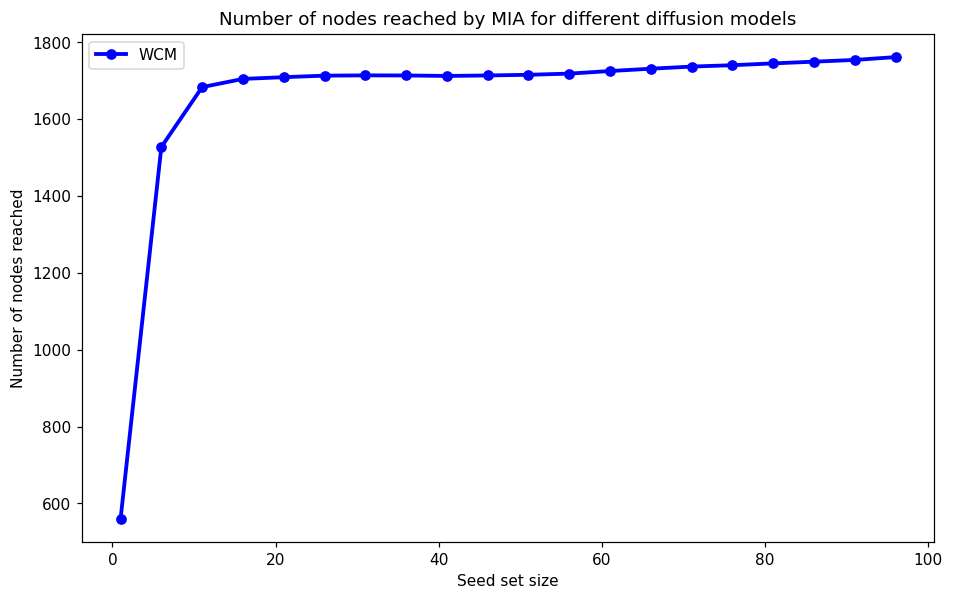

In [18]:
#plot the number of nodes reached by the seed sets generated by MIA using seed sets of size 5, 10, 20
plt.figure(figsize=(10,6), dpi=110)
#plt.plot(activate_nums_dict_icm.keys(), activate_nums_dict_icm.values(), color = "red", linewidth=2.5, linestyle="-", label="ICM", marker="o")
plt.plot(activate_nums_dict_wcm.keys(), activate_nums_dict_wcm.values(), color = "blue", linewidth=2.5, linestyle="-", label="WCM", marker="o")
#plt.plot(activate_nums_dict_dc.keys(), activate_nums_dict_dc.values(), color = "green", linewidth=2.5, linestyle="-", label="DC", marker="o")
#plt.plot(activate_nums_dict_tr.keys(), activate_nums_dict_tr.values(), color = "orange", linewidth=2.5, linestyle="-", label="TR", marker="o")
#plt.plot(activate_nums_dict_lt.keys(), activate_nums_dict_lt.values(), color = "purple", linewidth=2.5, linestyle="-", label="LT", marker="o")
#plt.plot(activate_nums_dict_gt.keys(), activate_nums_dict_gt.values(), color = "black", linewidth=2.5, linestyle="-", label="GT", marker="o")
plt.title("Number of nodes reached by MIA for different diffusion models")
plt.ylabel("Number of nodes reached")
plt.xlabel("Seed set size")
plt.legend()
plt.show()

# Trivalency probabilities + MIA 

In [8]:
trivalency_model_2020 = Trivalency_Model()
trivalency_model_2020.fit(pb2020)

In [8]:
# overwrite the weights in pb20_comms_subgraphs[12] as q/in-degree of the node for the outgoing edges of said node, where q=1
pb2020_trivalency = pb2020.copy()
for edge in pb2020_trivalency.edges():
    prob = trivalency_model_2020.probability[trivalency_model_2020.label2id[edge[0]], trivalency_model_2020.label2id[edge[1]]]
    
    if pb2020_trivalency.in_degree(edge[0]) == 0: # to avoid division by 0
        
        pb2020_trivalency[edge[0]][edge[1]]['weight'] = prob
        pb2020_trivalency[edge[0]][edge[1]]['weight_negative_log'] = np.abs(np.log(prob + 0.00000001)) # to avoid diverging to - infinity
    else:
        
        pb2020_trivalency[edge[0]][edge[1]]['weight'] = prob
        pb2020_trivalency[edge[0]][edge[1]]['weight_negative_log'] = np.abs(np.log(prob))

# turn the above code into a function where trivalency_model_2020 is the input, name the input "model"


In [11]:
np.unique([pb2020_trivalency[edge[0]][edge[1]]['weight'] for edge in pb2020_trivalency.edges()])

array([0.001, 0.01 , 0.1  ])

In [12]:
print(np.unique([pb2020_trivalency[edge[0]][edge[1]]['weight_negative_log'] for edge in pb2020_trivalency.edges()]))


[2.30258499 2.30258509 4.60516919 4.60517019 6.90774528 6.90775528]


In [13]:
mia_trivalency = MIA(pb2020_trivalency)

In [14]:
mia_trivalency.MIA_fast(pb2020_trivalency, 10, 0.5)

Starting MIA intialization


100%|██████████| 13217/13217 [00:30<00:00, 438.55it/s]


Initialization Completed


100%|██████████| 10/10 [01:13<00:00,  7.38s/it]


['ColoradoPOYB',
 'ColoradoPOYB',
 'ColoradoPOYB',
 'ColoradoPOYB',
 'ColoradoPOYB',
 'ColoradoPOYB',
 'ColoradoPOYB',
 'ColoradoPOYB',
 'ColoradoPOYB',
 'ColoradoPOYB']

In [22]:
mia_trivalency.MIA_fast(pb2020_trivalency, 10, 0.01)

Starting MIA intialization


100%|██████████| 13217/13217 [08:48<00:00, 25.01it/s] 


Initialization Completed


100%|██████████| 10/10 [12:37<00:00, 75.78s/it]  


['Premises187',
 'SmashCM79',
 'enrique_tarrio',
 'Virgil_McMahon',
 'principe_giovan',
 'ProudBoysUS',
 'MoralDK',
 'UKProudBoys',
 'tpope88834',
 'proudboy_']

# ICM probabilities model + MIA

In [16]:
ICM_model_2020 = Independent_Cascade()
ICM_model_2020.fit(pb2020)

In [17]:
# overwrite the weights in pb20_comms_subgraphs[12] as q/in-degree of the node for the outgoing edges of said node, where q=1
pb2020_ICM = pb2020.copy()
for edge in pb2020_ICM.edges():
    prob = ICM_model_2020.probability[ICM_model_2020.label2id[edge[0]], ICM_model_2020.label2id[edge[1]]]
    
    if pb2020_ICM.in_degree(edge[0]) == 0: # to avoid division by 0
        
        pb2020_ICM[edge[0]][edge[1]]['weight'] = prob
        pb2020_ICM[edge[0]][edge[1]]['weight_negative_log'] = np.abs(np.log(prob + 0.00000001)) # to avoid diverging to - infinity
    else:
        
        pb2020_ICM[edge[0]][edge[1]]['weight'] = prob
        pb2020_ICM[edge[0]][edge[1]]['weight_negative_log'] = np.abs(np.log(prob))


In [18]:
np.unique([pb2020_ICM[edge[0]][edge[1]]['weight'] for edge in pb2020_ICM.edges()])

array([0.16666667, 0.2       , 0.25      , 0.33333333, 0.5       ,
       1.        ])

In [19]:
np.unique([pb2020_ICM[edge[0]][edge[1]]['weight_negative_log'] for edge in pb2020_ICM.edges()])

array([0.00000000e+00, 9.99999989e-09, 6.93147161e-01, 1.09861226e+00,
       1.09861229e+00, 1.38629432e+00, 1.38629436e+00, 1.60943786e+00,
       1.60943791e+00, 1.79175941e+00, 1.79175947e+00])

In [20]:
mia_ICM = MIA(pb2020_ICM)

In [21]:
mia_ICM.MIA_fast(pb2020_ICM, 10, 0.5)

Starting MIA intialization


100%|██████████| 13217/13217 [00:30<00:00, 427.08it/s]


Initialization Completed


100%|██████████| 10/10 [02:09<00:00, 12.96s/it]


['Premises187',
 'SmashCM79',
 'enrique_tarrio',
 'ProudGirlUK',
 'ProudBoysUS',
 'principe_giovan',
 'proudboy_',
 'MoralDK',
 'TheWesternChauv',
 'proudboy2012']